In [166]:
import pandas as pd 
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
warnings.filterwarnings('ignore')

In [218]:
train = pd.read_csv('E:/python/data/学习赛/泰坦里克号/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('E:/python/data/学习赛/泰坦里克号/titanic/test.csv', index_col='PassengerId')
label  =train['Survived']
del train['Survived']
data = pd.concat([train,test],axis=0)


In [219]:
global head 
head  = []
def process_Ticket(x):
    global head
    s_head = "NONE"
    if(x=="LINE"):
        x = None
        s_head = 'LINE'
    elif ' ' in x:
        x = x.replace('/', "")
        x = x.replace('.', "")
        sp = x.split(" ")
        s_head = sp[0]
        if(len(sp) == 3):
            s_head += sp[1]
            x = sp[2]
        else:
            x = sp[1]
    head.append(s_head)
    return x
data['Ticket'] = data['Ticket'].apply(process_Ticket)
data['ticket_head'] = pd.Series(head, index=data.index)
data['Home_size'] = data['SibSp'] + data['Parch']
data['call'] = None

In [220]:
data['call'][data['Name'].str.contains('Miss.',regex=False)] = 'Miss.'
data['call'][data['Name'].str.contains('Mrs.',regex=False)] = 'Mrs.'
data['call'][data['Name'].str.contains('Mr.',regex=False)] = 'Mr.'
data['call'][data['Name'].str.contains('Master.',regex=False)] = 'Master.'
data['call'][data['Name'].str.contains('Ms.',regex=False)] = 'Ms.'
data['call'][data['Name'].str.contains('Dr.',regex=False)] = 'Dr.'
data['call'][data['Name'].str.contains('Don.',regex=False)] = 'Don.'
data['call'][data['Name'].str.contains('Rev.',regex=False)] = 'Rev.'
data['call'][data['Name'].str.contains('Mme.',regex=False)] = 'Mme.'
data['call'][data['Name'].str.contains('Major.',regex=False)] = 'Major.'
data['call'][data['Name'].str.contains('Col.',regex=False)] = 'Col.'
data['call'][data['Name'].str.contains('Capt.',regex=False)] = 'Capt.'
data['call'][data['Name'].str.contains('Jonkheer.',regex=False)] = 'Jonkheer.'
data['call'][data['Name'].str.contains('Dona.',regex=False)] = 'Dona.'
data['call'][data['Name'].str.contains('Mlle.',regex=False)] = 'Mlle.'
data['call'][data['Name'].str.contains('Countess.',regex=False)] = 'Countess.'
data['call'][data['Name'].str.contains('Lady.',regex=False)] = 'Lady.'
data['call'][data['Name'].str.contains('Sir.',regex=False)] = 'Sir.'
for i in range(data.shape[0]):
    if(pd.isna(data.loc[i+1,'Age'])):
        if(data.loc[i+1,'call'] == 'Miss.'):
            data.loc[i+1,'Age'] = data['Age'][data['call'] == 'Miss.'].mean()
        if(data.loc[i+1,'call'] == 'Mrs.'):
            data.loc[i+1,'Age'] = data['Age'][data['call'] == 'Mrs.'].mean()
        if(data.loc[i+1,'call'] == 'Mr.'):
            data.loc[i+1,'Age'] = data['Age'][data['call'] == 'Mr.'].mean()
        if(data.loc[i+1,'call'] == 'Master.'):
            data.loc[i+1,'Age'] = data['Age'][data['call'] == 'Master.'].mean()
        if(data.loc[i+1,'call'] == 'Ms.'):
            data.loc[i+1,'Age'] = data['Age'][data['call'] == 'Ms.'].mean()
        if(data.loc[i+1,'call'] == 'Dr.'):
            data.loc[i+1,'Age'] = data['Age'][data['call'] == 'Dr.'].mean()
data['call'][data.call=='Jonkheer.'] = 'Master.'
data['call'][data.call.isin(['Ms.','Mlle.'])] = 'Miss.'
data['call'][data.call.isin(['Mme.'])] = 'Mrs'
data['call'][data.call.isin(['Capt.', 'Don.', 'Major.', "Col."])] = 'Sir.'
data['call'][data.call.isin(['Countess.','Dona.'])] = 'Lady.'
data['call'].unique()
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)
data['Ticket'].fillna(data['Ticket'].mode()[0], inplace=True)
data['SurName'] = data['Name'].map(lambda x:re.compile(
    "(|Miss|Mrs|Mr|Master|Ms|Dr|Don|Rev|Mme|Major|Col|Capt|Jonkheer|Dona|Mlle|Countess|Lady|Sir)\.\s(\w*)")
                                   .findall(x)[0][1]
                                  )
del data['Cabin']
data['Name'] = data.Name.str.len()
data['Sex'] = data['Sex'].apply(lambda x: 1 if x=='male' else 0)
lr = LabelEncoder()
data['Embarked'] = lr.fit_transform(data['Embarked'])
lr = LabelEncoder()
data['ticket_head'] = lr.fit_transform(data['ticket_head'])
lr = LabelEncoder()
data['call'] = lr.fit_transform(data['call'])
lr = LabelEncoder()
data['SurName'] = lr.fit_transform(data['SurName'])
# sns.displot(data['Home_size'],bins=[0,3,11])
pd.cut(data['Home_size'],bins=[0,3,11],labels=[0,1])
# data['Home_size']
# data['Age'].describe()
# sns.displot(data['Age'],bins=range(0,80,5))
data['Age'] = pd.cut(data['Age'],bins=range(0,85,5),labels=range(0,80,5))

In [221]:
data.isna().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
ticket_head    0
Home_size      0
call           0
SurName        0
dtype: int64

In [222]:
data = pd.DataFrame(MinMaxScaler().fit_transform(data),index=data.index,columns=data.columns)

X = data.loc[:891,:]
T = data.loc[892:,:]

0.8100558659217877


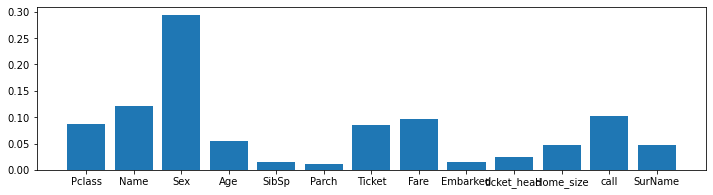

0.8258426966292135


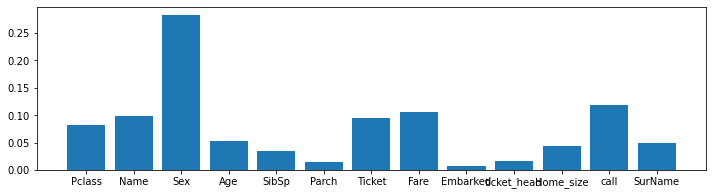

0.8202247191011236


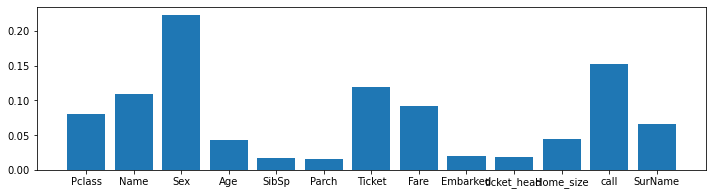

0.8651685393258427


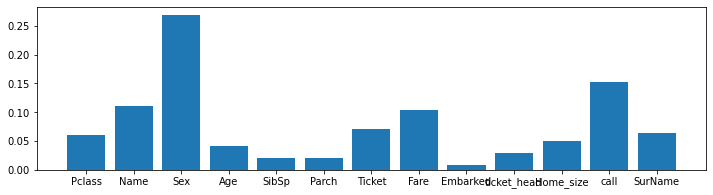

0.8595505617977528


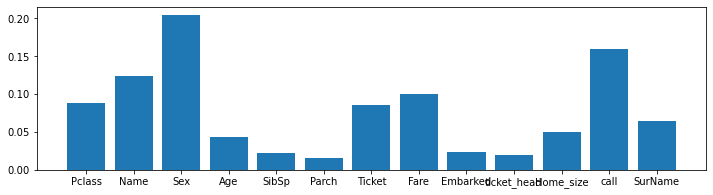

0.8361684765551441 0.7505489522157941


In [236]:
kf = KFold(n_splits=5, shuffle=True, random_state=20002)
threshold = 0.6
avg_score = 0
avg_f1_score = 0
submit = 0
for train_index, test_index in kf.split(X,label):
    X_train,X_test,Y_train,Y_test = X.iloc[train_index],X.iloc[test_index],label.iloc[train_index],label.iloc[test_index]
    model = RandomForestClassifier(n_estimators = 26,max_depth = 6,random_state=243, oob_score=True,max_features='sqrt')
    model.fit(X_train,Y_train)
    y_prob = model.predict_proba(X_test)[:,1]
    y_prob[y_prob>threshold] = 1
    y_prob[y_prob<threshold] = 0
    score = accuracy_score(Y_test, y_prob)
    avg_f1_score+=f1_score(Y_test, y_prob)
    avg_score+=score
    submit = model.predict(T)
    plt.figure(figsize=(12,3))
    print(score)
    plt.bar(X_train.columns, model.feature_importances_)
#     model.feature_importances_
    plt.show()
print(avg_score/5, avg_f1_score/5)

In [233]:
model = RandomForestClassifier(n_estimators = 26,max_depth = 6,random_state=243, oob_score=True,max_features='sqrt')
model.fit(X,label)
y_prob = model.predict_proba(T)[:,1]
y_prob[y_prob>threshold] = 1
y_prob[y_prob<threshold] = 0
y_prob = y_prob.astype(np.int32)
pd.Series(y_prob,index=test.index,name='Survived').to_csv('E:/python/data/学习赛/泰坦里克号/titanic/submit.csv')

In [232]:
y_prob

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,